In [1]:
#导入相关库和文件
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
sns.set(style = "white",color_codes =True)
import matplotlib.pyplot as plt

df = pd.read_csv("D:\\dataanalyse\\实战项目\\iris_data_visualizations\\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
 df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

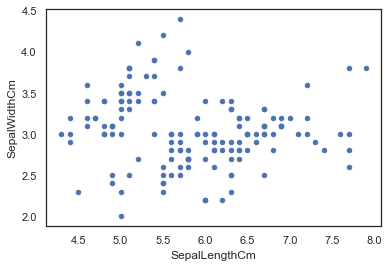

In [5]:
#绘制iris特征
df.plot(kind='scatter',x = 'SepalLengthCm' ,y = 'SepalWidthCm')  
#绘图时直接输入列的索引名称  不需要写   x= df['SepalLengthCm']

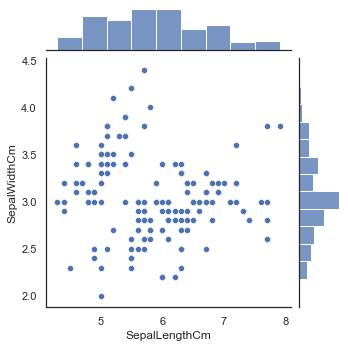

In [7]:
#此外也能使用seaborn包绘制相似的图形
sns.jointplot (x = 'SepalLengthCm',y = 'SepalWidthCm', data = df ,size = 5)
#size 为matplotlib中的参数
#当 seaborn 的函数与 matploblib 函数具有显然一致性时（例如 scatterplot() 和 plt.scatter），多余的参数会被直接传给 matploblib 层：

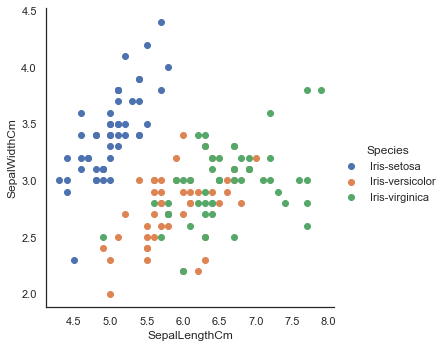

In [21]:
#在上面看不出各个物种的信息
#使用seaborn的facegrid 对不同物种上颜色
# g = sns.FacetGrid(data = df ,hue='Species',size = 5)
# g.map(plt.scatter, 'SepalLengthCm','SepalWidthCm')
# g.add_legend()
#或者简写
g = sns.FacetGrid(df, hue="Species", size=5) \      #未传入row、col参数，聚合在一个子图中
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

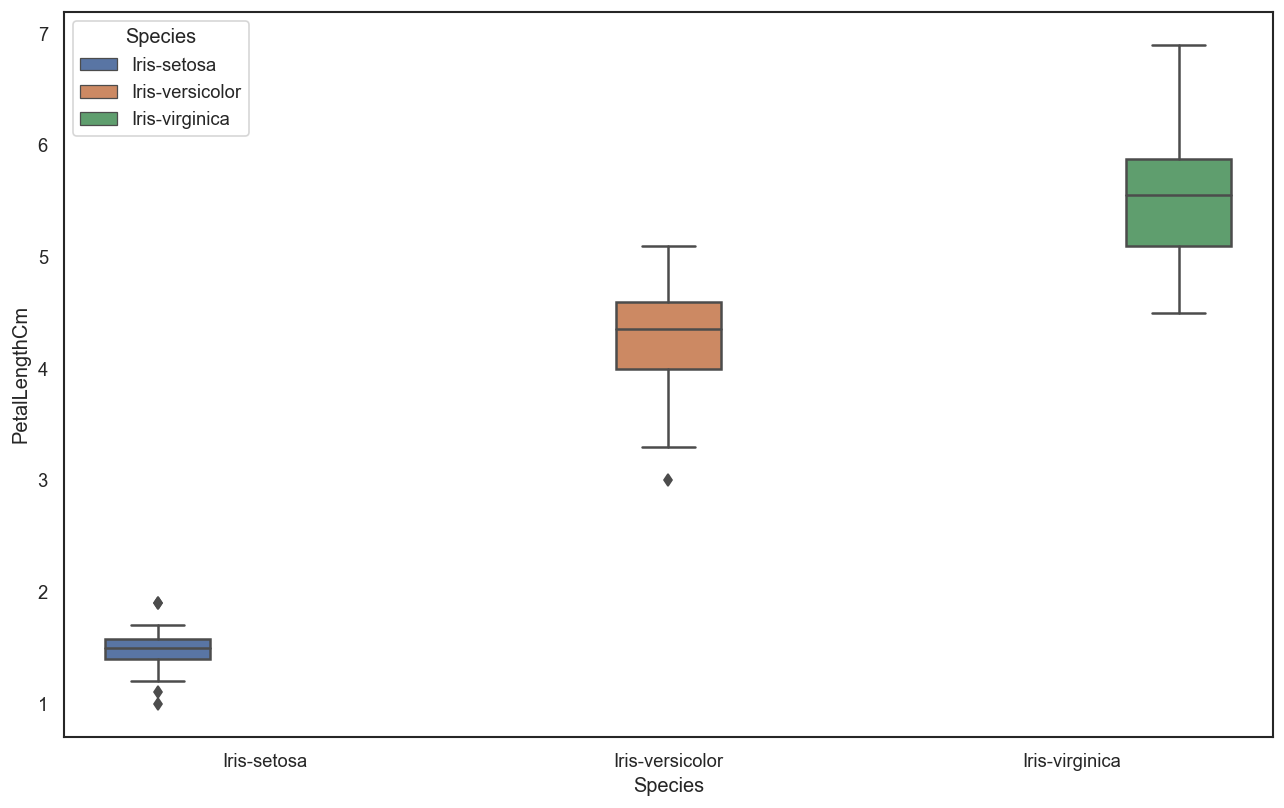

In [34]:
#使用 箱线图 看单个特征
ax2 = plt.figure(figsize=(13,8),dpi = 120)      #在sns函数之前添加一个figure函数来设置图形形状和分辨率
ax2 = sns.boxplot(x="Species", y="PetalLengthCm", data= df ,hue = 'Species')

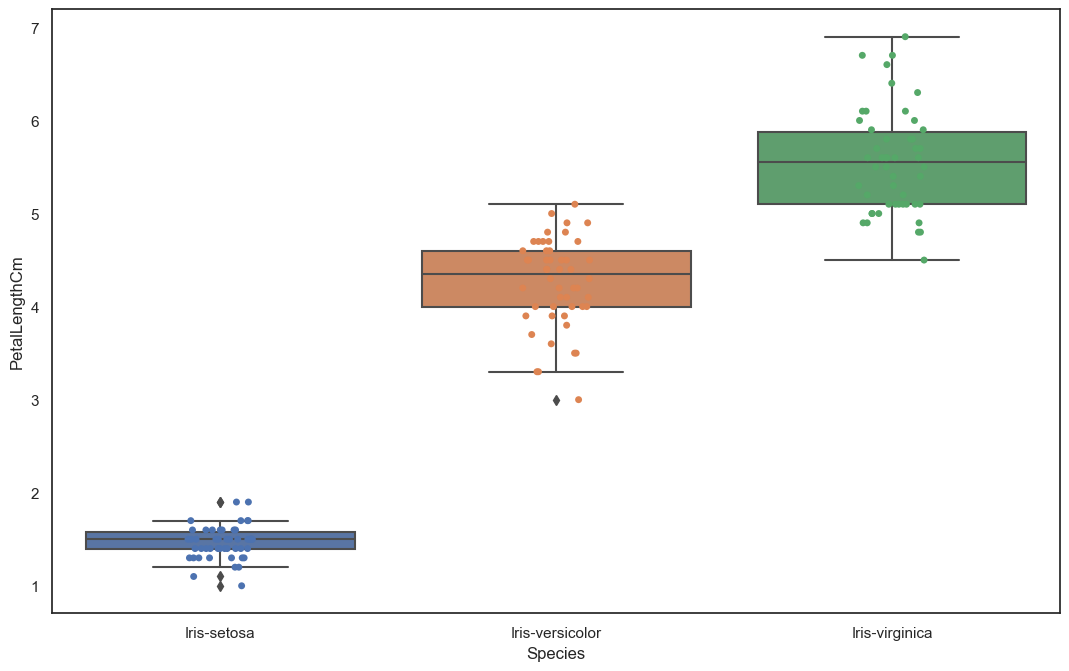

In [41]:
#使用 箱线图 看单个特征  并添加 数据点 
ax3 = plt.figure(figsize=(13,8),dpi = 100)
ax3 = sns.boxplot(x="Species", y="PetalLengthCm", data=df)
ax3 = sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True)

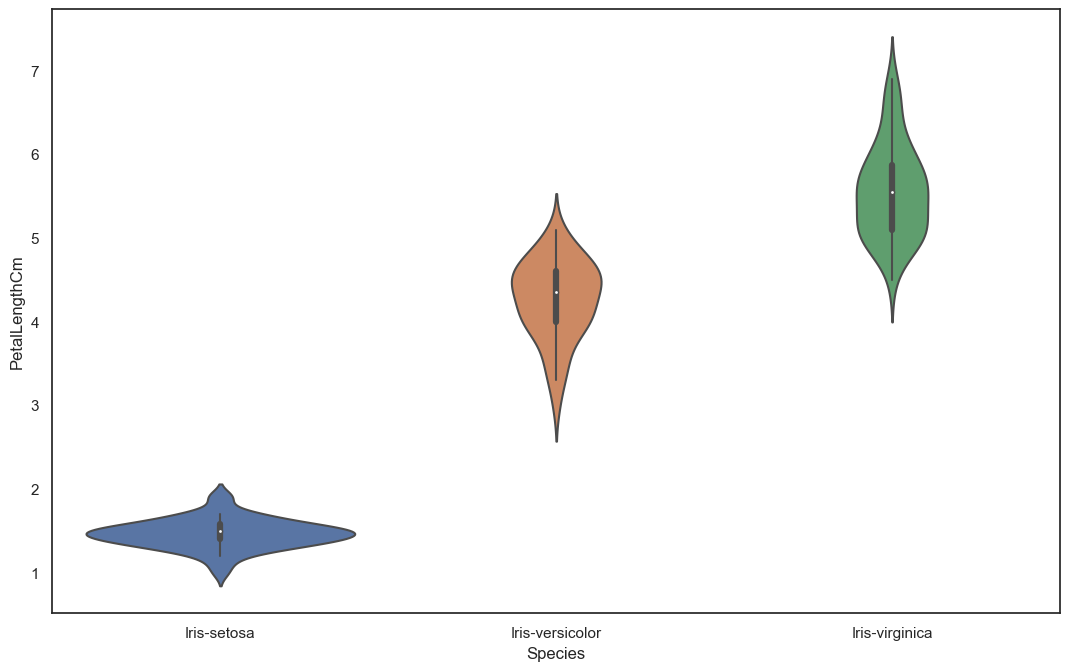

In [56]:
#小提琴图  在展示数据分布上结合了 箱线图 和条形散点图的优点
ax4 = plt.figure(figsize= (13,8),dpi = 100)
ax4 = sns.violinplot(x="Species", y="PetalLengthCm", data=df)

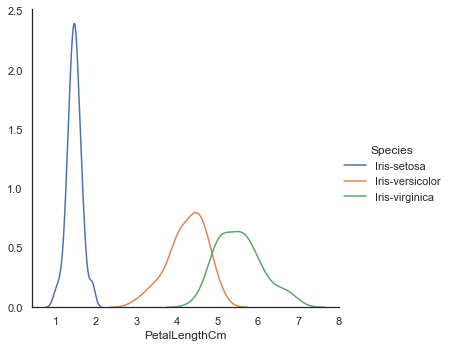

In [67]:
#核密度分布         如何修改其分辨率？
#ax5 = plt.figure(figsize= (13,8),dpi = 120)
ax5 = sns.FacetGrid(df,hue = 'Species',size = 5)\
    .map(sns.kdeplot,'PetalLengthCm')\
    .add_legend()

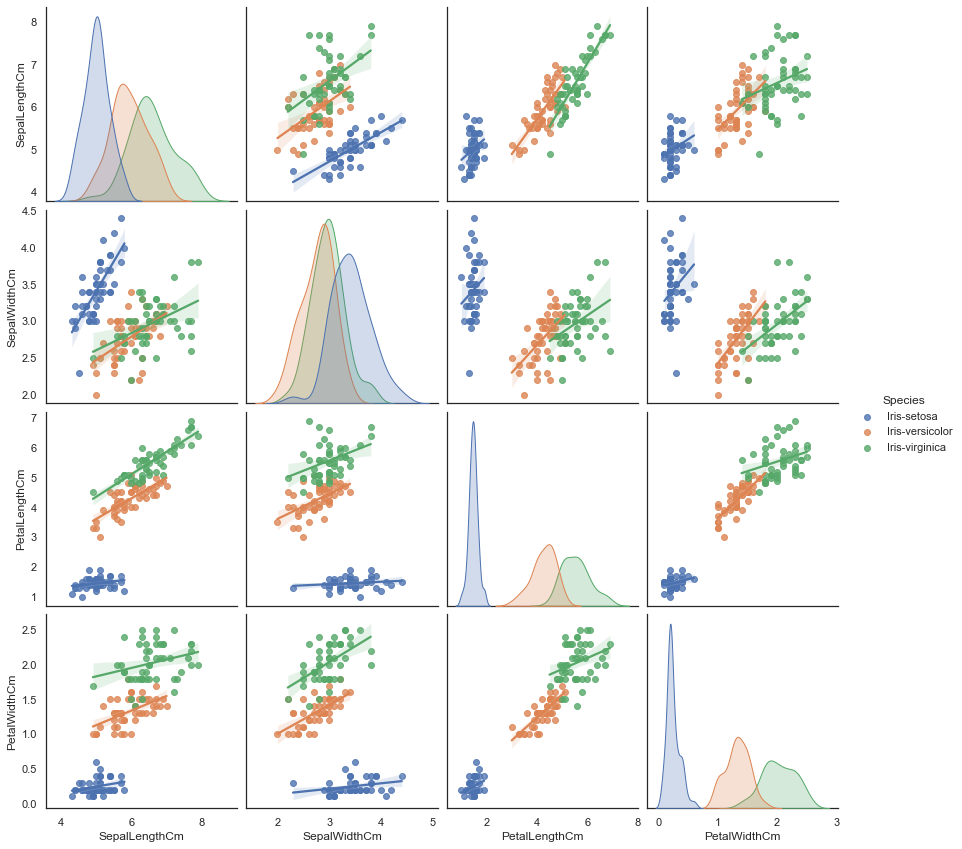

In [33]:
#pairplot 绘制出变量配对图
#ax6 = plt.figure(figsize = (20,8), dpi= 120)      未起作用
ax6 = sns.pairplot(df.drop('Id',axis= 1),hue = 'Species',kind="reg",size = 3)

<AxesSubplot:>

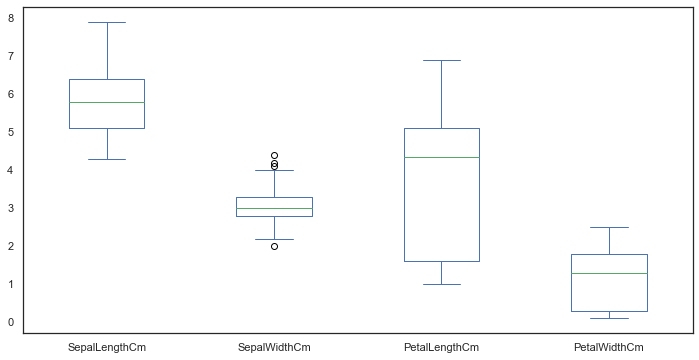

In [36]:
#使用一些pandas 自带的绘图方法绘图
df.drop('Id',axis = 1).plot(by = 'Species',kind = 'box' ,figsize = (12,6))

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

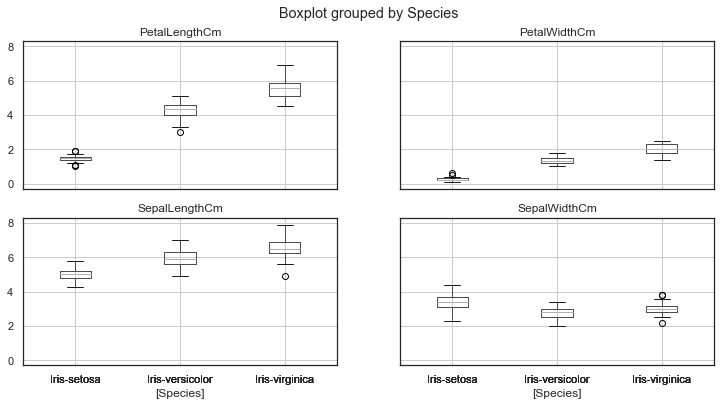

In [37]:
df.drop('Id',axis = 1).boxplot(by = 'Species',figsize = (12,6))